<a href="https://colab.research.google.com/github/Mayuri103120/DL_Learnings/blob/main/DL_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #math --> CPU
import torch #DL --> GPU 
import torchvision #datasets


In [ ]:
#how numpy and pytorch work well together
a = np.random.rand(2,3)
b = torch.from_numpy(a) #call the fromnumpy func from torch to convert a numpy array to tensor

print(a)
print(b)

#datatype of elements in the torch tensor is 64-bit floting point number

[[0.83115806 0.78856851 0.33488638]
 [0.1645173  0.42301511 0.24927771]]
tensor([[0.8312, 0.7886, 0.3349],
        [0.1645, 0.4230, 0.2493]], dtype=torch.float64)


In [ ]:
#we can perform efficient vectorized operations over diff dimensions of torch tensor
print(b+ 10.0)
print(torch.sin(b))
print()
print(b.sum())
print()
print(b.mean())
print()
print(b.shape)

tensor([[10.8312, 10.7886, 10.3349],
        [10.1645, 10.4230, 10.2493]], dtype=torch.float64)
tensor([[0.7387, 0.7093, 0.3287],
        [0.1638, 0.4105, 0.2467]], dtype=torch.float64)

tensor(2.7914, dtype=torch.float64)

tensor(0.4652, dtype=torch.float64)

torch.Size([2, 3])


In [ ]:
#checking if gpu is available to us by calling..
torch.cuda.is_available()



True

In [ ]:
#to see how much of GPU we are using is via NVIDIA..
!nvidia-smi
#so we are connected to environment that has a Tesla gpu i.e. T4 and we haven't used much of the memory yet, only 3MiB (mebibytes = 2^20).

Sat Feb  4 17:43:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    32W /  70W |      3MiB / 15360MiB |      6%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#torch believes everything is a tensor, this allows efficient operations such as mat mul across diff dimen of tensors
#helps in training NNs and it has 2 phases: forward and backward pass (both of these are mat mul)
#pytorch is powerful because we have auto differentiation built-in to it and this helps in backward pass when we train the NNs



$y(a,b) = a + b$


In [ ]:
a = torch.rand(1,1, requires_grad=True) #singleton tensors
b = torch.rand(1,1)
y = a+b
print("a:",a)
print("b:",b)
print("y:",y)

a: tensor([[0.6749]], requires_grad=True)
b: tensor([[0.5614]])
y: tensor([[1.2363]], grad_fn=<AddBackward0>)


In [ ]:
y.backward()
print("dy/da:",a.grad)

dy/da: tensor([[1.]])


$y = a^2b$

In [ ]:
a = torch.rand(1,1, requires_grad=True) #singleton tensors and we are taking the derivative wrt a
b = torch.rand(1,1)
y = a**2*b
print("a:",a)
print("b:",b)
print("y:",y)
y.backward()
print("dy/da:",a.grad)#gradient using back propagation
print("dy/da:",2*a*b) #to verify

a: tensor([[0.4537]], requires_grad=True)
b: tensor([[0.8016]])
y: tensor([[0.1650]], grad_fn=<MulBackward0>)
dy/da: tensor([[0.7274]])
dy/da: tensor([[0.7274]], grad_fn=<MulBackward0>)


In [ ]:
A = torch.rand(2,2)
b = torch.rand(2,1)
x = torch.rand(2,1, requires_grad=True)

y = torch.matmul(A,x)+b
z= y.sum()
print(z)

tensor(1.7453, grad_fn=<SumBackward0>)


In [ ]:
z.backward()
print("dz/dx:", x.grad)

dz/dx: tensor([[1.4511],
        [1.3419]])


In [ ]:
#train a simple model - single layer NN which is a classifier for an image dataset called fashion-MNIST
trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST', train=True, download = True, transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST', train=False, download = True, transform=torchvision.transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



In [ ]:
#sanity check
print(len(trainingdata))
print(len(testdata))

60000
10000


In [ ]:
#sanity check
image, label = trainingdata[0]
print(image.shape, label)

# 1 cuz its a greyscale image, for RGB its 3. label is 9

torch.Size([1, 28, 28]) 9


In [ ]:
#matplotlib can take only 2 dimensions so we squeeze out the singleton dimension
print(image.squeeze().shape)

torch.Size([28, 28])


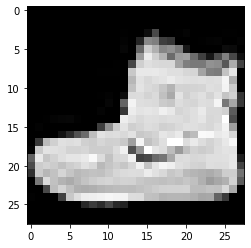

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  
# magic function so that it directly plots the image in our notebook environment
plt.imshow(image.squeeze(), cmap=plt.cm.gray)


In [ ]:
#how to convert dataset to dataloader to iterate through the dataset
trainDataLoader = torch.utils.data.DataLoader(trainingdata, batch_size=64,shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata, batch_size=64,shuffle=False)

In [ ]:
#sanity check
print(len(trainDataLoader))
print(len(testDataLoader))

#the dataloaders return batches of size 64 and to loop over the entire dataset we only need 938 and 157 iterations

938
157


In [ ]:
#how to work with the trainDataloader

images, labels = next(iter(trainDataLoader))
print(images.shape, labels.shape)

#Batch size, channel, height and Width

torch.Size([64, 1, 28, 28]) torch.Size([64])


$B \times C \times H \times W$

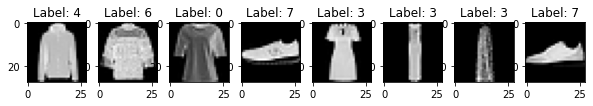

In [ ]:
plt.figure(figsize = (10,10))
for i in range(8):
  plt.subplot(1,8,i+1)
  plt.title(f'Label: {labels[i].item()}')
  plt.imshow(images[i].squeeze(), cmap = plt.cm.gray)

In [ ]:
#setting up the model. Pytorch is obj oriented
#single layer 
class LogisticReg(torch.nn.Module):
  def __init__(self):
    super(LogisticReg, self).__init__()
    self.linear = torch.nn.Linear(28*28, 10)
  def forward(self, x):
    x = x.view(-1, 28*28)
    return self.linear(x)

# representation 
model = LogisticReg().cuda()
#measure of goodness, For a classification problem we use cross entropy loss function
loss = torch.nn.CrossEntropyLoss()
#optimization
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)


In [ ]:
!nvidia-smi


Sat Feb  4 17:44:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    32W /  70W |    572MiB / 15360MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [25]:
#training the above model

train_loss_history = []
test_loss_history =[]

# 1 epoch is when we have passed over the entire training dataset 20 times to keep track of training and test losses
for epoch in range(20):
  train_loss =0.0
  test_loss = 0.0

  model.train()
  for i, data in enumerate(trainDataLoader):
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    optimizer.zero_grad()
    predicted_outputs = model(images) #forward pass
    fit = loss(predicted_outputs, labels) # calculate loss
    fit.backward() #backward pass
    optimizer.step() #updates the weights of the network
    train_loss += fit.item()

  model.eval()
  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      images = images.cuda()
      labels = labels.cuda()
      predicted_outputs = model(images)
      fir = loss(predicted_outputs, labels)
      test_loss += fir.item()
  
  train_loss = train_loss/ len(trainDataLoader)
  test_loss = test_loss/ len(testDataLoader)
  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)
  print(f'Epoch {epoch}, Train Loss {train_loss}, Test Loss {test_loss}')

Epoch 0, Train Loss 0.9645936908498247, Test Loss 0.7408766507343122
Epoch 1, Train Loss 0.6696567905228784, Test Loss 0.6488903052867598
Epoch 2, Train Loss 0.6047922889433944, Test Loss 0.6046174867137982
Epoch 3, Train Loss 0.5696370330001754, Test Loss 0.5797179895601455
Epoch 4, Train Loss 0.5463222686860607, Test Loss 0.5612319358594858
Epoch 5, Train Loss 0.5296940068636876, Test Loss 0.5501377899555644
Epoch 6, Train Loss 0.5168045559989364, Test Loss 0.5368327792662724
Epoch 7, Train Loss 0.5067505755467709, Test Loss 0.5287347604894335
Epoch 8, Train Loss 0.49823709251656967, Test Loss 0.5207430900661809
Epoch 9, Train Loss 0.4909536846156822, Test Loss 0.5151342584449015
Epoch 10, Train Loss 0.4847601395743742, Test Loss 0.5097782923157808
Epoch 11, Train Loss 0.479404616616428, Test Loss 0.5060997798943975
Epoch 12, Train Loss 0.47454922854392007, Test Loss 0.5023393887243454
Epoch 13, Train Loss 0.4702858774583223, Test Loss 0.4988341948408989
Epoch 14, Train Loss 0.466610